### 날짜별로 데이터 그룹핑하기

In [11]:
import pandas as pd
df = pd.read_csv("naver_news_lecture.csv", encoding="ansi")
df = df[['press','category','title','contents','date']]

In [12]:
df = df[df["press"]=="JTBC"]

In [13]:
# 날짜 데이터 확인
pd.Series(df["date"]).value_counts()

20190627    111
20190625    111
20190626    108
20190624     96
20190628     91
20190630     62
20190629     32
Name: date, dtype: int64

In [14]:
# 날짜 데이터 추출
date_list = pd.Series(df["date"]).drop_duplicates()
print(date_list)

5870    20190624
5966    20190625
6077    20190626
6185    20190627
6296    20190628
6387    20190629
6419    20190630
Name: date, dtype: int64


In [15]:
# 날짜 별로 데이터 취합
data = []
for date in date_list:
    contents_list = df[df["date"] == date]["contents"]
    text_list = contents_list.tolist()
    merge_text = (" ").join(text_list)
    data.append(merge_text)

In [16]:
len(data)

7

### SciKit-learn 라이브러리를 통해 TF-IDF 구하기

In [17]:
# TfidfVectorizer 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer

from IPython.display import clear_output

In [18]:
# 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [19]:
doc_list = []
progress = 0
for corpus in data:
    nouns = kkma.nouns(corpus)
    
    # 한글자 제거
    nouns = [ w for w in nouns if len(w) > 1 ]
    doc_list.append((" ").join(nouns))
    
    progress += 1
    clear_output(wait=True)
    print("진행 상황 :", progress, "/", len(data))

KeyboardInterrupt: 

In [11]:
# TF-IDF 계산
vect = TfidfVectorizer(max_df=0.95, min_df=0.3)
tfidf = vect.fit_transform(doc_list)    

In [12]:
tfidf.shape

(7, 5743)

In [13]:
# 어휘사전
tfidf_dict = vect.get_feature_names()

In [14]:
print(tfidf_dict[:100])

['00', '03', '05', '08', '10', '100', '1000명', '100여', '10곳', '10년', '10대', '10명', '10분', '10분에', '10시', '10여', '10월', '10일', '11명을', '11시에', '11시쯤', '11억', '11월', '11일', '11회는', '12', '12년', '12시', '12월', '12월부터', '12일', '13', '13개', '13일', '14일', '15', '150mm', '150명이', '15년', '15일', '16', '1600만', '16일', '17일', '18일', '19', '1991년', '1998년', '19개', '19명의', '19일', '1로', '1만', '1명', '1명이', '1박', '1분', '1분도', '1시', '1시간', '1시간이', '1심에서', '1억', '1월', '1위', '1위를', '1인', '1일', '1주일', '1차', '20', '2000만', '2002년', '2003년', '2007년', '200m', '200mm', '2010년', '2012년', '2014년', '2015년', '2016년', '2018년', '2019년', '2028년', '2032년', '20mm의', '20개국', '20년', '20분', '20분쯤', '20일', '21', '21년', '21일', '2200억', '22일', '24', '24시간', '24일에']


In [15]:
import pandas as pd

data_array = tfidf.toarray()
df = pd.DataFrame(data_array, columns=tfidf_dict, index=date_list)

In [16]:
df

,00,03,05,08,10,100,1000명,100여,10곳,10년,...,흥미로운,희망을,흰색,힐링,힘든,힘들게,힘들다,힘을,힘이,힘입어
date,,,,,,,,,,,,,,,,,,,,,
20190624,0.025614,0.019211,0.012807,0.014751,0.005609,0.006404,0.000000,0.006404,0.007376,0.022437,...,0.056093,0.006404,0.011219,0.007376,0.000000,0.012807,0.000000,0.014813,0.007376,0.007376
20190625,0.017111,0.028518,0.022814,0.013139,0.004996,0.005704,0.013139,0.000000,0.000000,0.014989,...,0.019985,0.000000,0.004996,0.006569,0.028518,0.005704,0.000000,0.017592,0.000000,0.000000
20190626,0.000000,0.017438,0.005813,0.000000,0.010184,0.000000,0.006695,0.005813,0.000000,0.010184,...,0.000000,0.000000,0.005092,0.000000,0.023251,0.005813,0.006695,0.004482,0.000000,0.006695
20190627,0.000000,0.000000,0.000000,0.000000,0.005448,0.018657,0.007163,0.012438,0.007163,0.005448,...,0.000000,0.006219,0.010896,0.000000,0.006219,0.000000,0.007163,0.023978,0.007163,0.007163
20190628,0.000000,0.000000,0.000000,0.000000,0.006183,0.000000,0.000000,0.007058,0.008129,0.000000,...,0.006183,0.007058,0.006183,0.000000,0.000000,0.007058,0.000000,0.005442,0.016259,0.000000
20190629,0.010482,0.010482,0.010482,0.024146,0.000000,0.020964,0.000000,0.000000,0.000000,0.009182,...,0.055092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20190630,0.014341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031406,0.007171,0.000000,0.008259,0.014341,0.000000,0.008259,0.005529,0.000000,0.000000


In [17]:
df.T

date,20190624,20190625,20190626,20190627,20190628,20190629,20190630
00,0.025614,0.017111,0.000000,0.000000,0.000000,0.010482,0.014341
03,0.019211,0.028518,0.017438,0.000000,0.000000,0.010482,0.000000
05,0.012807,0.022814,0.005813,0.000000,0.000000,0.010482,0.000000
08,0.014751,0.013139,0.000000,0.000000,0.000000,0.024146,0.000000
10,0.005609,0.004996,0.010184,0.005448,0.006183,0.000000,0.000000
100,0.006404,0.005704,0.000000,0.018657,0.000000,0.020964,0.000000
1000명,0.000000,0.013139,0.006695,0.007163,0.000000,0.000000,0.000000
100여,0.006404,0.000000,0.005813,0.012438,0.007058,0.000000,0.000000
10곳,0.007376,0.000000,0.000000,0.007163,0.008129,0.000000,0.000000
10년,0.022437,0.014989,0.010184,0.005448,0.000000,0.009182,0.000000


In [18]:
df = df.T

In [19]:
df[df[20190630] == df[20190630].max()]

date,20190624,20190625,20190626,20190627,20190628,20190629,20190630
만남이,0.0,0.0,0.0,0.007163,0.0,0.072439,0.189958


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [21]:
top1 = df[20190630].sort_values(ascending=False).head(50)
top2 = df[20190626].sort_values(ascending=False).head(50)

In [22]:
# 날짜별로 워드클라우드를 출력하여 일별 키워드 트렌드를 분석
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [1]:
fig = plt.figure(figsize=(30,30))
idx = 0
for date in date_list:
    top = df[date].sort_values(ascending=False).head(50)
    
    wordcloud = WordCloud(max_font_size=100, 
                          min_font_size = 5,
                          width=600, 
                          height=600, 
                          background_color='white', 
                          font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(top)
    idx += 1
    plt.subplot(3,3,idx)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(date)
    plt.axis("off")
plt.show()

NameError: name 'plt' is not defined

In [32]:
from collections import Counter
word_count = []
cnt = 0
for idx in range(len(word_list)):
    count = Counter(word_list[idx])
    word_count.append(count)
    
    # 진행 상황을 출력
    cnt += 1
    clear_output(wait=True)
    print("진행 상황 :", cnt, "/", len(word_list))

진행 상황 : 7 / 7


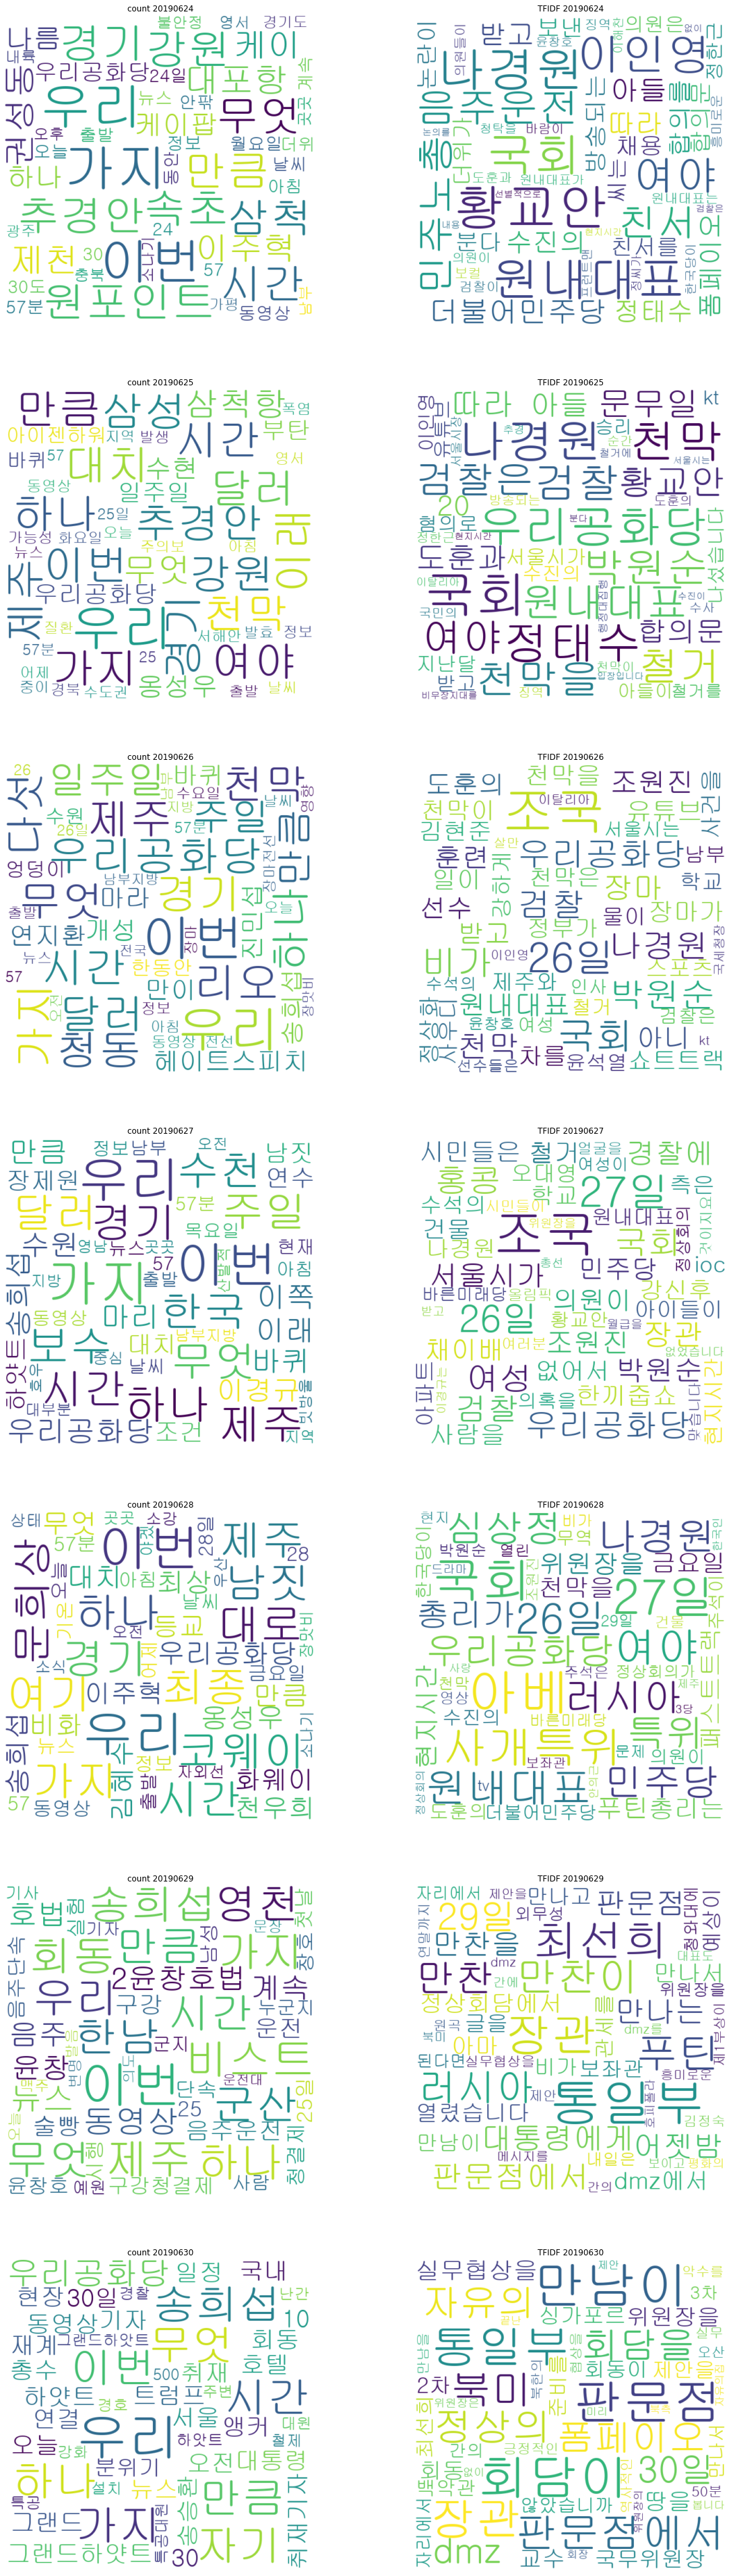

In [61]:
fig = plt.figure(figsize=(20,80))
cnt_idx = 0
for date in date_list:
    cnt = word_count[cnt_idx].most_common(50)
    wordcloud = WordCloud(max_font_size=100, 
                          min_font_size = 5,
                          width=600, 
                          height=600, 
                          background_color='white', 
                          prefer_horizontal = 0.9999, # 단어의 수평 표시 비율
                          font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(dict(cnt))
    cnt_idx+= 1
    w_idx = cnt_idx*2+1
    plt.subplot(8,2,w_idx)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("count " + str(date))
    plt.axis("off")
    
    top = df[date].sort_values(ascending=False).head(50)
    wordcloud = WordCloud(max_font_size=100, 
                          min_font_size = 5,
                          width=600, 
                          height=600, 
                          background_color='white', 
                          prefer_horizontal = 0.9999, # 단어의 수평 표시 비율
                          font_path="C:\Windows\Fonts\gulim.ttc").generate_from_frequencies(top)
    
    plt.subplot(8,2,w_idx+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title("TFIDF " + str(date))
    plt.axis("off")
    
    
plt.show()